# Diabetes Prediction Case Study

## Problem Statement

### Background:
Diabetes is one of the most frequent diseases worldwide and the number of diabetic patients is growing over the years. The main cause of diabetes remains unknown, yet scientists believe that both genetic factors and environmental lifestyle play a major role in diabetes. 

Individuals with diabetes face a risk of developing some secondary health issues such as heart diseases and nerve damage. Thus, early detection and treatment of diabetes can prevent complications and assist in reducing the risk of severe health problems. 
Even though it's incurable, it can be managed by treatment and medication.

Researchers at the Bio-Solutions lab want to get a better understanding of this disease among women and are planning to use machine learning models that will help them to identify patients who are at risk of diabetes. 

You as a data scientist at Bio-Solutions have to build a classification model using a dataset collected by the "National Institute of Diabetes and Digestive and Kidney Diseases" consisting of several attributes that would help to identify whether a person is at risk of diabetes or not.

### Objective:

To build a model to predict whether an individual is at risk of diabetes or not.

### Data Description:

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skinfold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* Pedigree: Diabetes pedigree function - A function that scores likelihood of diabetes based on family history.
* Age: Age in years
* Class: Class variable (0: the person is not diabetic or 1: the person is diabetic)

## Importing Libraries

In [1]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries for handling datasets
import numpy as np
import pandas as pd

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Libraries for classification
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score,
                             confusion_matrix, make_scorer) 

# Setting the theme and fontsize of figures
sns.set_theme(style = 'darkgrid', font_scale = 1.13)

# Restricting the float value of a dataframe to 3 decimal points
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# Removing the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Mounting drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Loading Dataset

In [2]:
# Loading the dataset
data_orig = pd.read_csv('/content/drive/MyDrive/Python_files/pima-indians-diabetes.csv')
# Ensuring the original dataset remains unchanged
df = data_orig.copy()

## Overview of Dataset

### Viewing the Head and Tail of Dataset

In [3]:
# Viewing top 5 rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Class
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [4]:
# Viewing bottom 5 rows
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Class
763,10,101,76,48,180,32.900,0.171,63,0
764,2,122,70,27,0,36.800,0.340,27,0
765,5,121,72,23,112,26.200,0.245,30,0
766,1,126,60,0,0,30.100,0.349,47,1
767,1,93,70,31,0,30.400,0.315,23,0


### Shape of Dataset

In [5]:
# Shape of dataset
print('The dataset has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

The dataset has 768 rows and 9 columns.


### General Information on Dataset's Columns

In [6]:
# General info of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Class          768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Missing and Duplicated Entries

In [7]:
# Missing and duplicated entries
print('The dataset has {} missing values and {} duplicated entries.'
        .format(df.isnull().sum().sum(), df.duplicated().sum()))

The dataset has 0 missing values and 0 duplicated entries.


In [8]:
# Converting no. of pregnancies and diabetes status into categories (temporarily)
df['Pregnancies'] = pd.Categorical(df['Pregnancies'])
df['Class'] = pd.Categorical(df['Class'])
df['Class'].replace([0, 1], ['Non-diabetic', 'Diabetic'], inplace = True)

### Statistical Summary

In [9]:
# Statistical summary (numerical)
df.describe(include = np.number).T

,count,mean,std,min,25%,50%,75%,max
Glucose,768.000,120.895,31.973,0.000,99.000,117.000,140.250,199.000
BloodPressure,768.000,69.105,19.356,0.000,62.000,72.000,80.000,122.000
SkinThickness,768.000,20.536,15.952,0.000,0.000,23.000,32.000,99.000
Insulin,768.000,79.799,115.244,0.000,0.000,30.500,127.250,846.000
BMI,768.000,31.993,7.884,0.000,27.300,32.000,36.600,67.100
Pedigree,768.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420
Age,768.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000


#### Notes:

Minima of several variables are zero, which is physically impossible. For instance, BMI = 0 means that a person's weight is zero, or SkinThickness = 0 means that someone's skin has no thickness! These are most likely missing values and will be imputed. 

In [10]:
# Statistical summary (numerical)
cat_stats = df.describe(include = ['object', 'category']).T
cat_stats['fraction'] = cat_stats['freq']/cat_stats['count'] 
cat_stats

,count,unique,top,freq,fraction
Pregnancies,768,17,1,135,0.176
Class,768,2,Non-diabetic,500,0.651


### Replacing Impossible Zeros with NaN

In [11]:
# List of all vars with several unexpected (and impossible) zeros
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replacing zeros with np.nan
for col in zero_cols:
    df[col] = df[col].replace(0, np.nan)

## Exploratory Data Analysis

In [12]:
# Auxiliary function for annotating the bars in a countplot
def countplot_labeling(cntplt, data, perc = True, decimal = 1):
  ''' This function gets a countplot and the dataset that has generated
  the plot to produce the values corresponding to each bar (category).
  If perc = True, percentages will be shown.'''

  from math import isnan

  total = data.shape[0]  # total number of values in the dataset
  for p in cntplt.patches:
        height_val = float(p.get_height())
        if(isnan(height_val)):
          height_val = 0
        if(abs(height_val - round(height_val)) < 1e-6):
          height_val = int(height_val)  
        if perc == True:
          # percentage of each category
          label = "{:.1f}%".format(100*height_val/total)
        else:
          label = "{}".format(round(height_val, decimal))  # count of each category
        x = p.get_x() + p.get_width()/2  # width of the plot
        y = p.get_height()  # height of the plot

        if(height_val == 0):
          label = '0'

        # annotate the bar
        cntplt.annotate(label, (x, y), ha = "center", va = "center", size = 12, xytext = (0, 5), textcoords = "offset points")  

### Univariate Analysis

**`Pregnancies`**



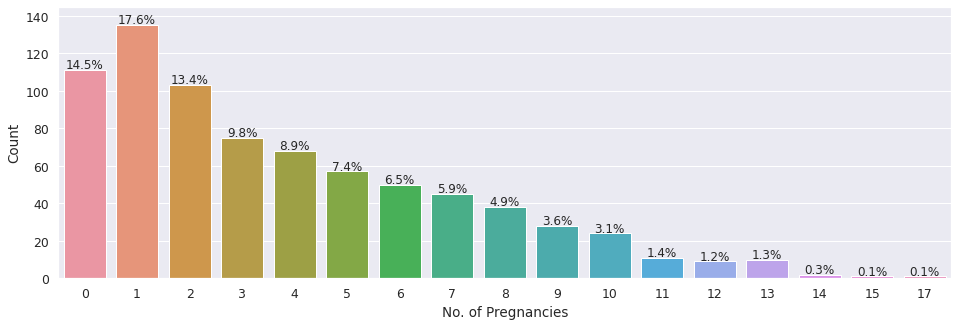

In [13]:
plt.figure(figsize = (16, 5));
cntplt = sns.countplot(data = df, x = 'Pregnancies');
countplot_labeling(cntplt, df);
plt.xlabel('No. of Pregnancies');
plt.ylabel('Count');
plt.ylim(0, 145);

**`Diabetes Status`**



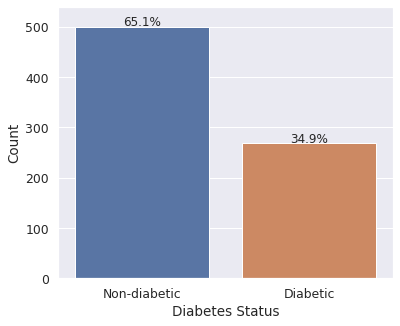

In [14]:
plt.figure(figsize = (6, 5));
cntplt = sns.countplot(data = df, x = 'Class', order = ['Non-diabetic', 'Diabetic']);
countplot_labeling(cntplt, df);
plt.xlabel('Diabetes Status');
plt.ylabel('Count');
plt.ylim(0, 540);

**`Glucose Level`**

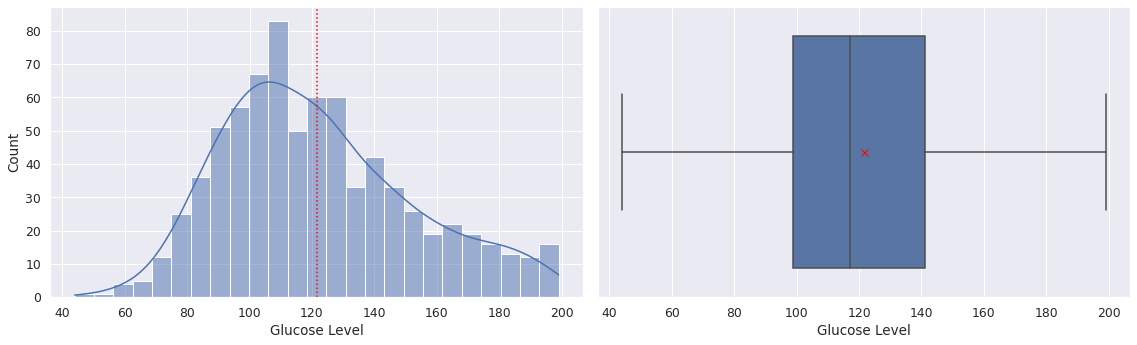

In [15]:
plt.figure(figsize = (16, 5));
plt.subplot(121);
sns.histplot(data = df, x = 'Glucose', kde = True, bins = 25);
plt.axvline(df.Glucose.mean(), linestyle = ':', color = 'red');
plt.xlabel('Glucose Level');
plt.subplot(122);
sns.boxplot(data = df, x = 'Glucose', showmeans = True, 
             meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Glucose Level');
plt.tight_layout();

**`Blood Pressure Level`**

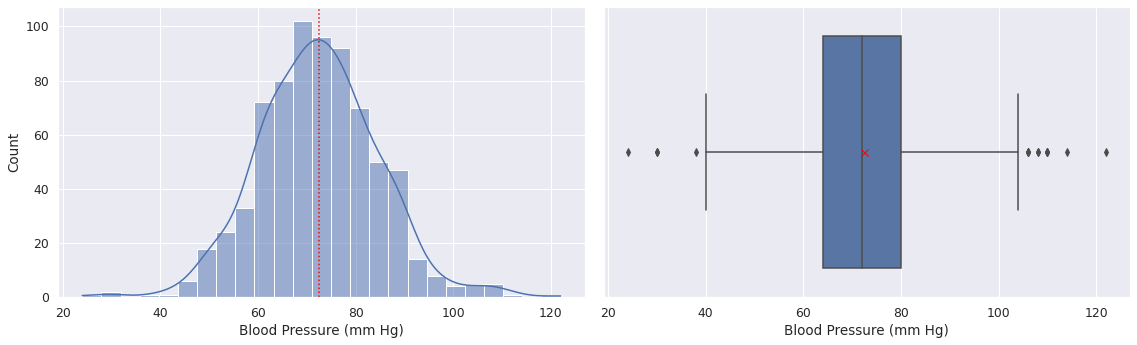

In [16]:
plt.figure(figsize = (16, 5));
plt.subplot(121);
sns.histplot(data = df, x = 'BloodPressure', kde = True, bins = 25);
plt.axvline(df.BloodPressure.mean(), linestyle = ':', color = 'red');
plt.xlabel('Blood Pressure (mm Hg)');
plt.subplot(122);
sns.boxplot(data = df, x = 'BloodPressure', showmeans = True, 
             meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Blood Pressure (mm Hg)');
plt.tight_layout();

**`Skin Thickness`**

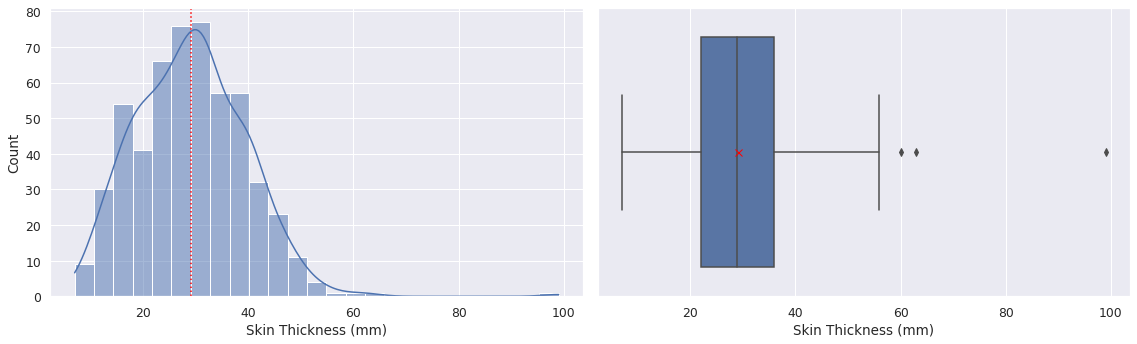

In [17]:
plt.figure(figsize = (16, 5));
plt.subplot(121);
sns.histplot(data = df, x = 'SkinThickness', kde = True, bins = 25);
plt.axvline(df.SkinThickness.mean(), linestyle = ':', color = 'red');
plt.xlabel('Skin Thickness (mm)');
plt.subplot(122);
sns.boxplot(data = df, x = 'SkinThickness', showmeans = True, 
             meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Skin Thickness (mm)');
plt.tight_layout();

**`Insulin`**

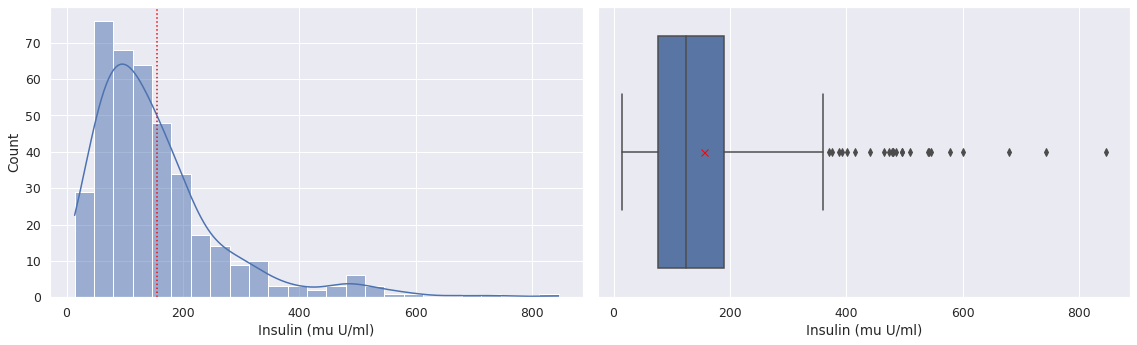

In [18]:
plt.figure(figsize = (16, 5));
plt.subplot(121);
sns.histplot(data = df, x = 'Insulin', kde = True, bins = 25);
plt.axvline(df.Insulin.mean(), linestyle = ':', color = 'red');
plt.xlabel('Insulin (mu U/ml)');
plt.subplot(122);
sns.boxplot(data = df, x = 'Insulin', showmeans = True, 
             meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Insulin (mu U/ml)');
plt.tight_layout();

**`BMI`**

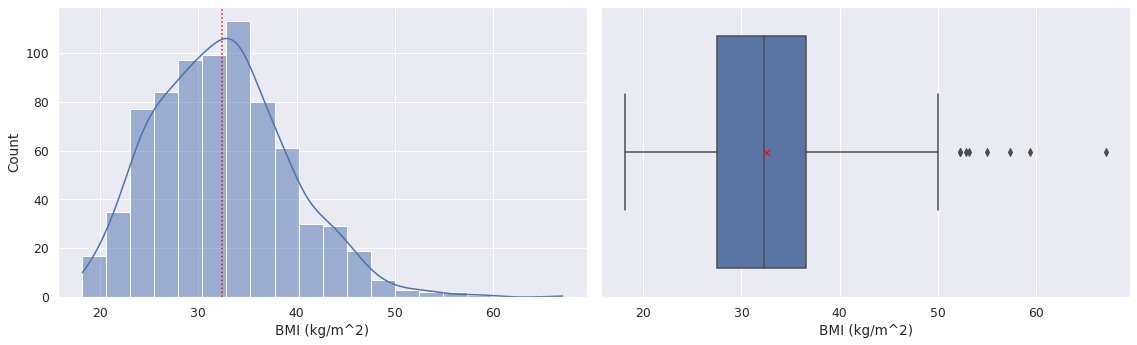

In [19]:
plt.figure(figsize = (16, 5));
plt.subplot(121);
sns.histplot(data = df, x = 'BMI', kde = True, bins = 20);
plt.axvline(df.BMI.mean(), linestyle = ':', color = 'red');
plt.xlabel('BMI (kg/m^2)');
plt.subplot(122);
sns.boxplot(data = df, x = 'BMI', showmeans = True, 
             meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('BMI (kg/m^2)');
plt.tight_layout(); 

**`Pedigree`**

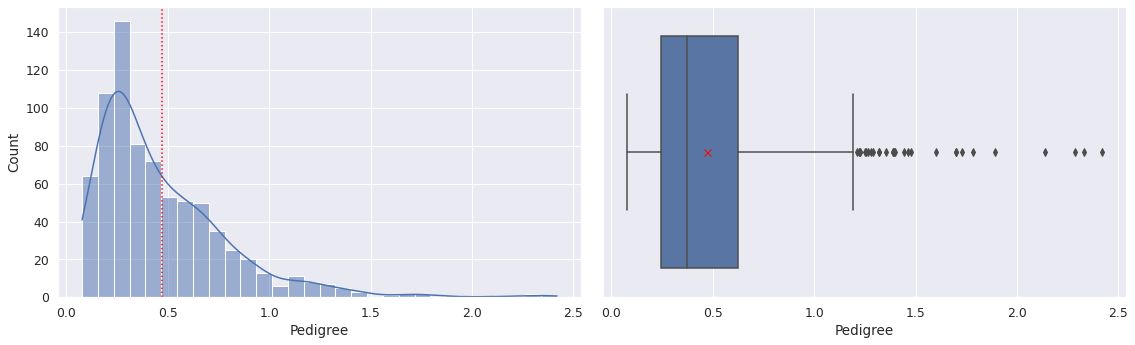

In [20]:
plt.figure(figsize = (16, 5));
plt.subplot(121);
sns.histplot(data = df, x = 'Pedigree', kde = True, bins = 30);
plt.axvline(df.Pedigree.mean(), linestyle = ':', color = 'red');
plt.xlabel('Pedigree');
plt.subplot(122);
sns.boxplot(data = df, x = 'Pedigree', showmeans = True, 
             meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Pedigree');
plt.tight_layout(); 

**`Age`**

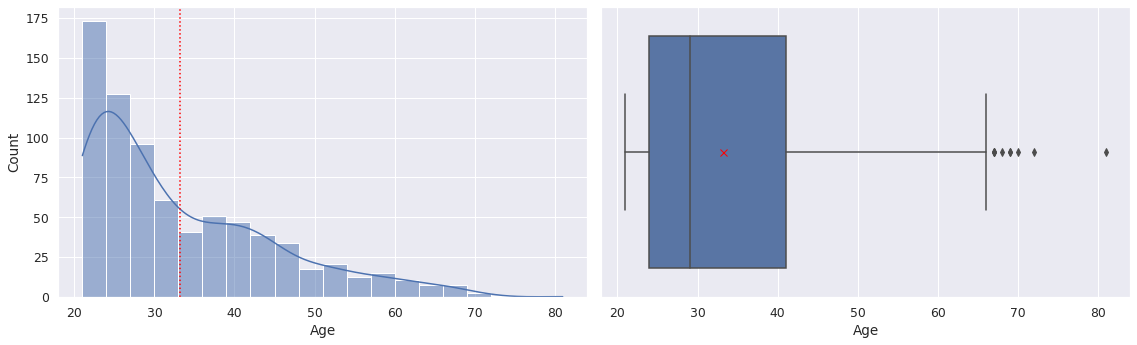

In [21]:
plt.figure(figsize = (16, 5));
plt.subplot(121);
sns.histplot(data = df, x = 'Age', kde = True, bins = 20);
plt.axvline(df.Age.mean(), linestyle = ':', color = 'red');
plt.xlabel('Age');
plt.subplot(122);
sns.boxplot(data = df, x = 'Age', showmeans = True, 
             meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Age');
plt.tight_layout(); 

### Bivariate Analysis

In [22]:
# Converting pregnancies back to numerical
df['Pregnancies'] = df['Pregnancies'].astype(int)
# Creating a numerical diabetes status variable
df['Class_num'] = df['Class'].replace(['Non-diabetic', 'Diabetic'], [0, 1])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        763 non-null    float64
 2   BloodPressure  733 non-null    float64
 3   SkinThickness  541 non-null    float64
 4   Insulin        394 non-null    float64
 5   BMI            757 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Class          768 non-null    object 
 9   Class_num      768 non-null    int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 60.1+ KB


**`Heatmap Correlation of Numerical Variables`**

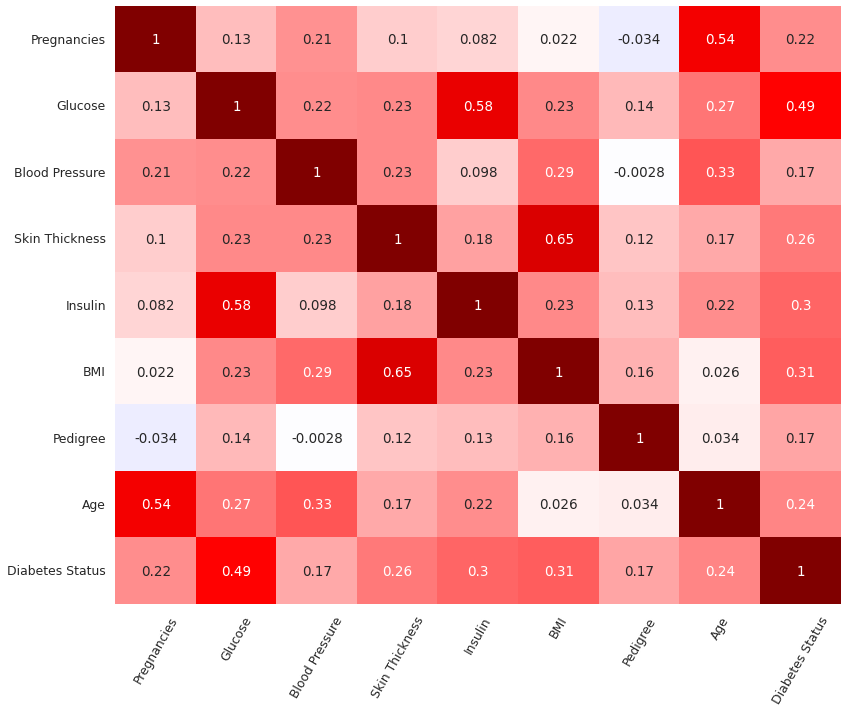

In [23]:
# Plotting the correlation between numerical vars as a heatmap
plt.figure(figsize = (13, 11));
corrmap = sns.heatmap(df.corr(), annot = True, cmap = 'seismic', cbar = False, vmin = -1, vmax = 1);
corrmap.set_xticklabels(['Pregnancies', 'Glucose', 'Blood Pressure', 'Skin Thickness', 'Insulin',
                         'BMI', 'Pedigree', 'Age', 'Diabetes Status'], rotation = 60);
corrmap.set_yticklabels(['Pregnancies', 'Glucose', 'Blood Pressure', 'Skin Thickness', 'Insulin',
                         'BMI', 'Pedigree', 'Age', 'Diabetes Status']);

**`Diabetes Status vs. Pregnancies`**

In [24]:
# Creating a function that puts no. of pregnancies in intervals
df['Pregnancy_range'] =  pd.cut(df['Pregnancies'], bins = [0, 1, 3, 6, 11, 20], 
                                labels = ['0', '1-2', '3-5', '6-10', '> 10'], right = False)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Class,Class_num,Pregnancy_range
0,6,148.000,72.000,35.000,NaN,33.600,0.627,50,Diabetic,1,6-10
1,1,85.000,66.000,29.000,NaN,26.600,0.351,31,Non-diabetic,0,1-2
2,8,183.000,64.000,NaN,NaN,23.300,0.672,32,Diabetic,1,6-10
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,Non-diabetic,0,1-2
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33,Diabetic,1,0


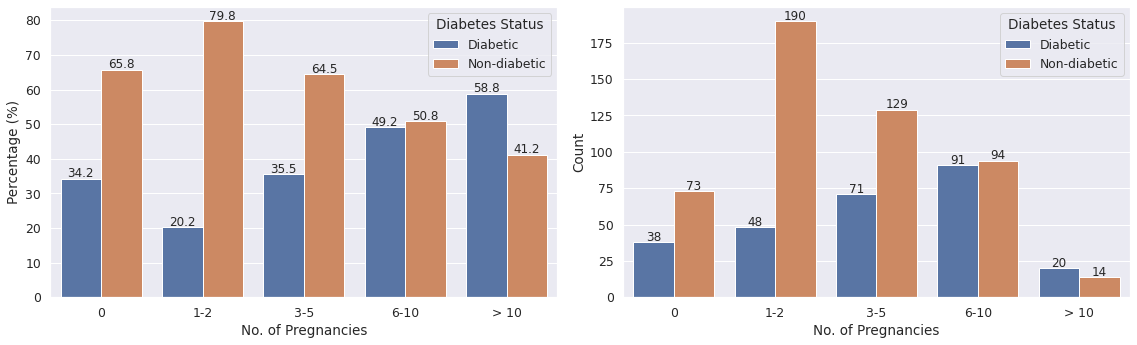

In [25]:
# Making a crosstab of pregnancies (cat) and diabetes status
ctab = pd.crosstab(df['Pregnancy_range'], df['Class'], normalize = 'index');
# Turning the crosstab into a dataframe
ctab_df = ctab.stack().reset_index()
ctab_df.rename(columns = {0: 'value'}, inplace = True)
ctab_df['value'] = ctab_df['value']*100

plt.figure(figsize = (16, 5));
# Plotting crosstab in percentage form
plt.subplot(121);
barplt = sns.barplot(data = ctab_df, x = 'Pregnancy_range', hue = 'Class', y = 'value');
countplot_labeling(barplt, ctab_df, perc = False);
plt.legend(title = 'Diabetes Status', loc = 'upper right').set_visible(True);
plt.xlabel('No. of Pregnancies');
plt.ylabel('Percentage (%)');
# Plotting crosstab in count form
plt.subplot(122);
cntplt = sns.countplot(data = df, x = 'Pregnancy_range', hue = 'Class');
countplot_labeling(cntplt, df, perc = False);
plt.legend(title = 'Diabetes Status', loc = 'upper right').set_visible(True);
plt.xlabel('No. of Pregnancies');
plt.ylabel('Count');
plt.tight_layout();

**`Diabetes Status vs. Glucose`**

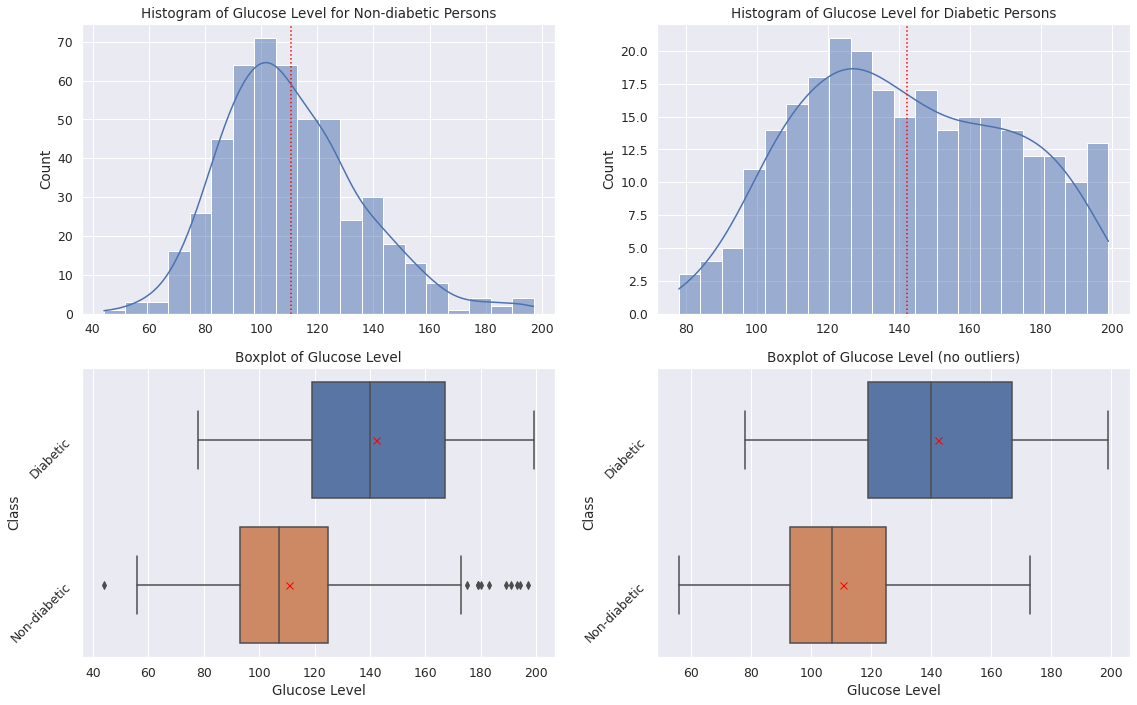

In [26]:
# Plotting the distribution of glucose level wrt diabetes status 
plt.figure(figsize = (16, 10));
# Histograms
plt.subplot(221);
sns.histplot(data = df.loc[df.Class == 'Non-diabetic'], x = 'Glucose', kde = True, bins = 20);
plt.axvline(df.loc[df.Class == 'Non-diabetic'].Glucose.mean(), linestyle = ':', color = 'red');
plt.xlabel('');
plt.title('Histogram of Glucose Level for Non-diabetic Persons');
plt.subplot(222);
sns.histplot(data = df.loc[df.Class == 'Diabetic'], x = 'Glucose', kde = True, bins = 20);
plt.axvline(df.loc[df.Class == 'Diabetic'].Glucose.mean(), linestyle = ':', color = 'red');
plt.xlabel('');
plt.title('Histogram of Glucose Level for Diabetic Persons');
# Boxplots
plt.subplot(223);
bxplt = sns.boxplot(data = df, x = 'Glucose', y = 'Class', showmeans = True, 
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Glucose Level');
plt.yticks(rotation = 45);
plt.title('Boxplot of Glucose Level');
bxplt.yaxis.labelpad = -13
plt.subplot(224);
bxplt = sns.boxplot(data = df, x = 'Glucose', y = 'Class', showmeans = True, showfliers = False,
             meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Glucose Level');
plt.yticks(rotation = 45);
plt.title('Boxplot of Glucose Level (no outliers)');
bxplt.yaxis.labelpad = -13
plt.tight_layout(w_pad = 2);

**`Diabetes Status vs. Blood Pressure`**

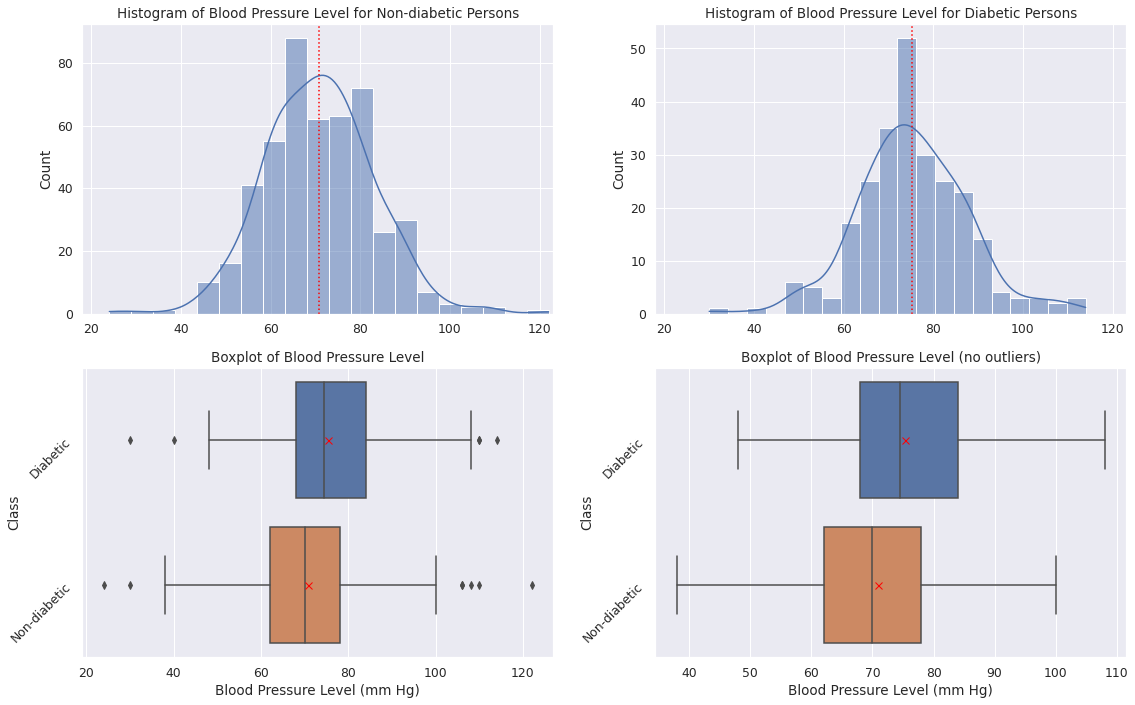

In [27]:
# Plotting the distribution of blood pressure level wrt diabetes status 
plt.figure(figsize = (16, 10));
# Histograms
plt.subplot(221);
sns.histplot(data = df.loc[df.Class == 'Non-diabetic'], x = 'BloodPressure', kde = True, bins = 20);
plt.axvline(df.loc[df.Class == 'Non-diabetic'].BloodPressure.mean(), linestyle = ':', color = 'red');
plt.xlabel('');
plt.xlim(18, 123);
plt.title('Histogram of Blood Pressure Level for Non-diabetic Persons');
plt.subplot(222);
sns.histplot(data = df.loc[df.Class == 'Diabetic'], x = 'BloodPressure', kde = True, bins = 20);
plt.axvline(df.loc[df.Class == 'Diabetic'].BloodPressure.mean(), linestyle = ':', color = 'red');
plt.xlabel('');
plt.xlim(18, 123);
plt.title('Histogram of Blood Pressure Level for Diabetic Persons');
# Boxplots
plt.subplot(223);
bxplt = sns.boxplot(data = df, x = 'BloodPressure', y = 'Class', showmeans = True, 
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Blood Pressure Level (mm Hg)');
plt.yticks(rotation = 45);
plt.title('Boxplot of Blood Pressure Level');
bxplt.yaxis.labelpad = -13
plt.subplot(224);
bxplt = sns.boxplot(data = df, x = 'BloodPressure', y = 'Class', showmeans = True, showfliers = False,
             meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Blood Pressure Level (mm Hg)');
plt.yticks(rotation = 45);
plt.title('Boxplot of Blood Pressure Level (no outliers)');
bxplt.yaxis.labelpad = -13
plt.tight_layout(w_pad = 2);

**`Diabetes Status vs. Skin Thickness`**

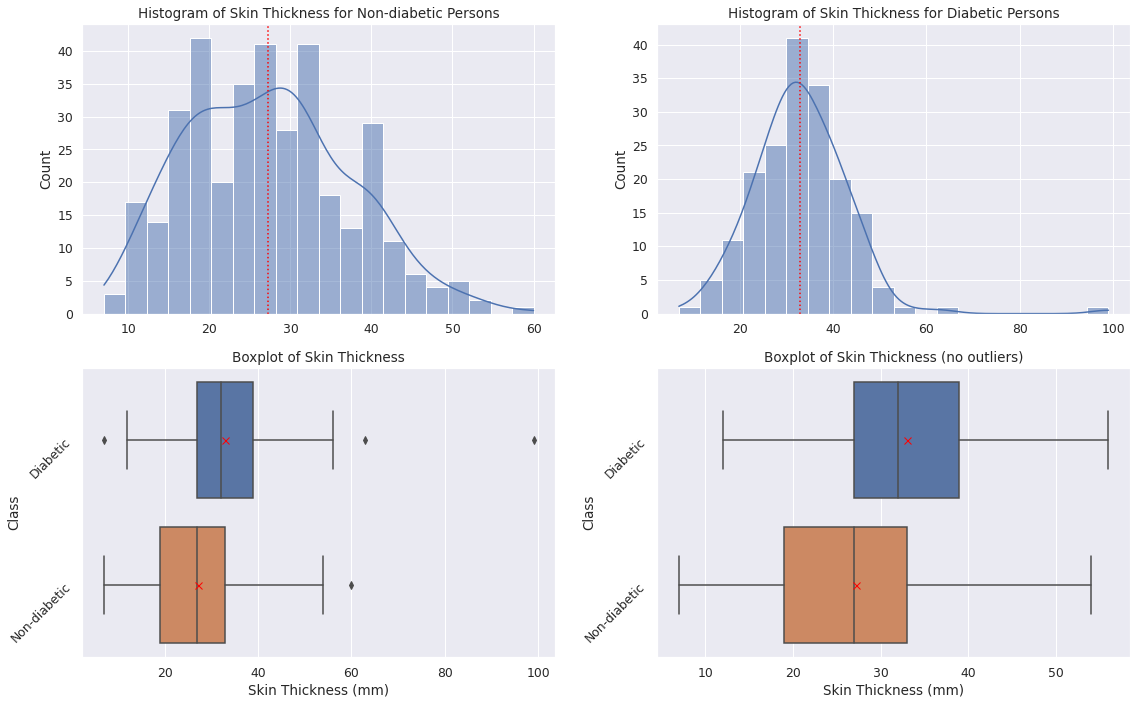

In [28]:
# Plotting the distribution of skin thickness wrt diabetes status 
plt.figure(figsize = (16, 10));
# Histograms
plt.subplot(221);
sns.histplot(data = df.loc[df.Class == 'Non-diabetic'], x = 'SkinThickness', kde = True, bins = 20);
plt.axvline(df.loc[df.Class == 'Non-diabetic'].SkinThickness.mean(), linestyle = ':', color = 'red');
plt.xlabel('');
plt.title('Histogram of Skin Thickness for Non-diabetic Persons');
plt.subplot(222);
sns.histplot(data = df.loc[df.Class == 'Diabetic'], x = 'SkinThickness', kde = True, bins = 20);
plt.axvline(df.loc[df.Class == 'Diabetic'].SkinThickness.mean(), linestyle = ':', color = 'red');
plt.xlabel('');
plt.title('Histogram of Skin Thickness for Diabetic Persons');
# Boxplots
plt.subplot(223);
bxplt = sns.boxplot(data = df, x = 'SkinThickness', y = 'Class', showmeans = True, 
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Skin Thickness (mm)');
plt.yticks(rotation = 45);
plt.title('Boxplot of Skin Thickness');
bxplt.yaxis.labelpad = -13
plt.subplot(224);
bxplt = sns.boxplot(data = df, x = 'SkinThickness', y = 'Class', showmeans = True, showfliers = False,
             meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Skin Thickness (mm)');
plt.yticks(rotation = 45);
plt.title('Boxplot of Skin Thickness (no outliers)');
bxplt.yaxis.labelpad = -13
plt.tight_layout(w_pad = 2);

**`Diabetes Status vs. Insulin`**

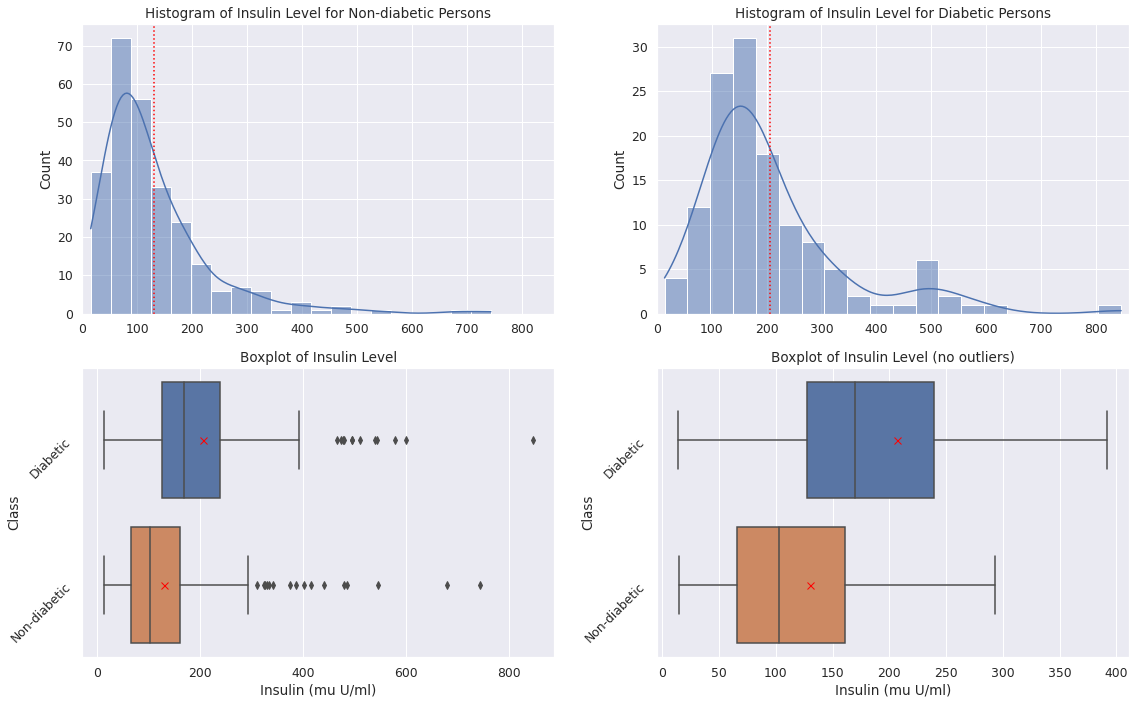

In [29]:
# Plotting the distribution of insulin level wrt diabetes status 
plt.figure(figsize = (16, 10));
# Histograms
plt.subplot(221);
sns.histplot(data = df.loc[df.Class == 'Non-diabetic'], x = 'Insulin', kde = True, bins = 20);
plt.axvline(df.loc[df.Class == 'Non-diabetic'].Insulin.mean(), linestyle = ':', color = 'red');
plt.xlabel('');
plt.xlim(0, 860);
plt.title('Histogram of Insulin Level for Non-diabetic Persons');
plt.subplot(222);
sns.histplot(data = df.loc[df.Class == 'Diabetic'], x = 'Insulin', kde = True, bins = 20);
plt.axvline(df.loc[df.Class == 'Diabetic'].Insulin.mean(), linestyle = ':', color = 'red');
plt.xlabel('');
plt.xlim(0, 860);
plt.title('Histogram of Insulin Level for Diabetic Persons');
# Boxplots
plt.subplot(223);
bxplt = sns.boxplot(data = df, x = 'Insulin', y = 'Class', showmeans = True, 
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Insulin (mu U/ml)');
plt.yticks(rotation = 45);
plt.title('Boxplot of Insulin Level');
bxplt.yaxis.labelpad = -13
plt.subplot(224);
bxplt = sns.boxplot(data = df, x = 'Insulin', y = 'Class', showmeans = True, showfliers = False,
             meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Insulin (mu U/ml)');
plt.yticks(rotation = 45);
plt.title('Boxplot of Insulin Level (no outliers)');
bxplt.yaxis.labelpad = -13
plt.tight_layout(w_pad = 2);

**`Diabetes Status vs. Pedigree`**

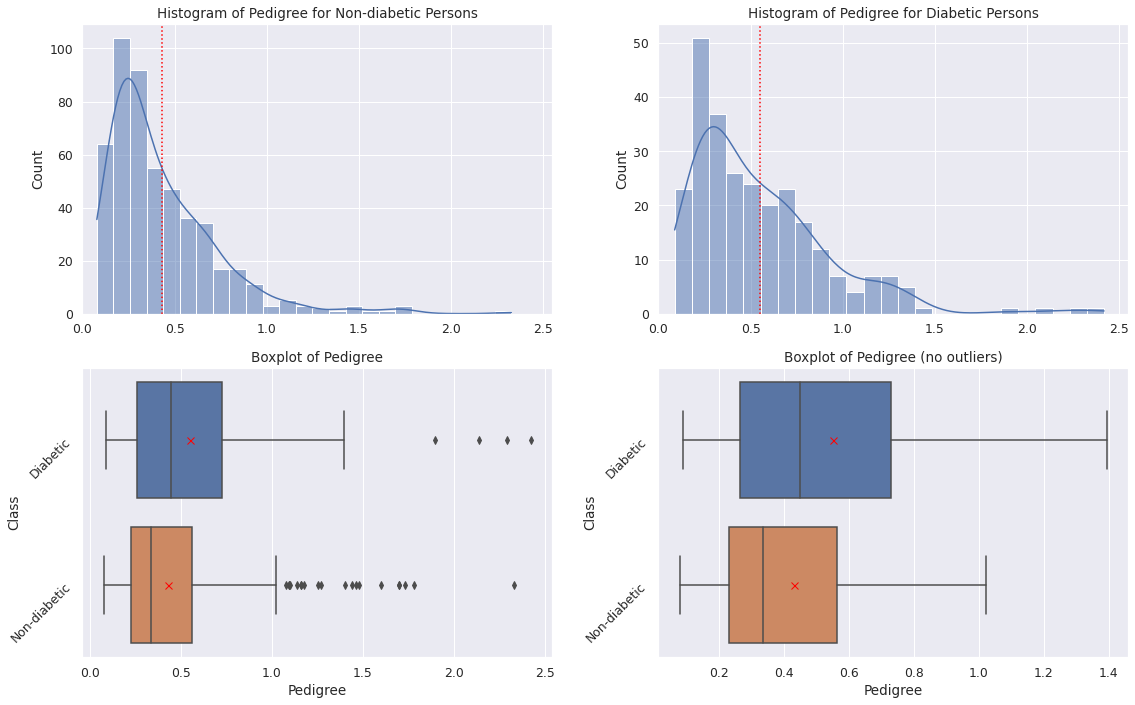

In [30]:
# Plotting the distribution of pedigree wrt diabetes status 
plt.figure(figsize = (16, 10));
# Histograms
plt.subplot(221);
sns.histplot(data = df.loc[df.Class == 'Non-diabetic'], x = 'Pedigree', kde = True, bins = 25);
plt.axvline(df.loc[df.Class == 'Non-diabetic'].Pedigree.mean(), linestyle = ':', color = 'red');
plt.xlabel('');
plt.xlim(0, 2.55);
plt.title('Histogram of Pedigree for Non-diabetic Persons');
plt.subplot(222);
sns.histplot(data = df.loc[df.Class == 'Diabetic'], x = 'Pedigree', kde = True, bins = 25);
plt.axvline(df.loc[df.Class == 'Diabetic'].Pedigree.mean(), linestyle = ':', color = 'red');
plt.xlabel('');
plt.xlim(0, 2.55);
plt.title('Histogram of Pedigree for Diabetic Persons');
# Boxplots
plt.subplot(223);
bxplt = sns.boxplot(data = df, x = 'Pedigree', y = 'Class', showmeans = True, 
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Pedigree');
plt.yticks(rotation = 45);
plt.title('Boxplot of Pedigree');
bxplt.yaxis.labelpad = -13
plt.subplot(224);
bxplt = sns.boxplot(data = df, x = 'Pedigree', y = 'Class', showmeans = True, showfliers = False,
             meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Pedigree');
plt.yticks(rotation = 45);
plt.title('Boxplot of Pedigree (no outliers)');
bxplt.yaxis.labelpad = -13
plt.tight_layout(w_pad = 2);

**`Diabetes Status vs. BMI`**

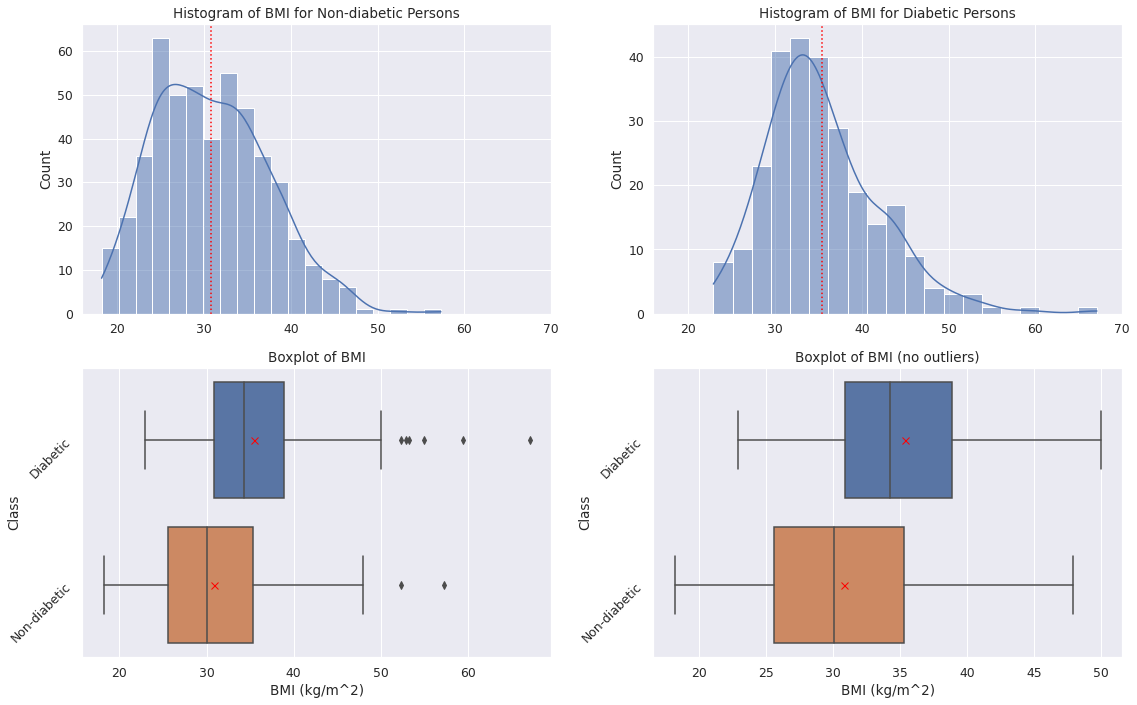

In [31]:
# Plotting the distribution of BMI wrt diabetes status 
plt.figure(figsize = (16, 10));
# Histograms
plt.subplot(221);
sns.histplot(data = df.loc[df.Class == 'Non-diabetic'], x = 'BMI', kde = True, bins = 20);
plt.axvline(df.loc[df.Class == 'Non-diabetic'].BMI.mean(), linestyle = ':', color = 'red');
plt.xlabel('');
plt.xlim(16, 70);
plt.title('Histogram of BMI for Non-diabetic Persons');
plt.subplot(222);
sns.histplot(data = df.loc[df.Class == 'Diabetic'], x = 'BMI', kde = True, bins = 20);
plt.axvline(df.loc[df.Class == 'Diabetic'].BMI.mean(), linestyle = ':', color = 'red');
plt.xlabel('');
plt.xlim(16, 70);
plt.title('Histogram of BMI for Diabetic Persons');
# Boxplots
plt.subplot(223);
bxplt = sns.boxplot(data = df, x = 'BMI', y = 'Class', showmeans = True, 
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('BMI (kg/m^2)');
plt.yticks(rotation = 45);
plt.title('Boxplot of BMI');
bxplt.yaxis.labelpad = -13
plt.subplot(224);
bxplt = sns.boxplot(data = df, x = 'BMI', y = 'Class', showmeans = True, showfliers = False,
             meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('BMI (kg/m^2)');
plt.yticks(rotation = 45);
plt.title('Boxplot of BMI (no outliers)');
bxplt.yaxis.labelpad = -13
plt.tight_layout(w_pad = 2);

**`Diabetes Status vs. Age`**

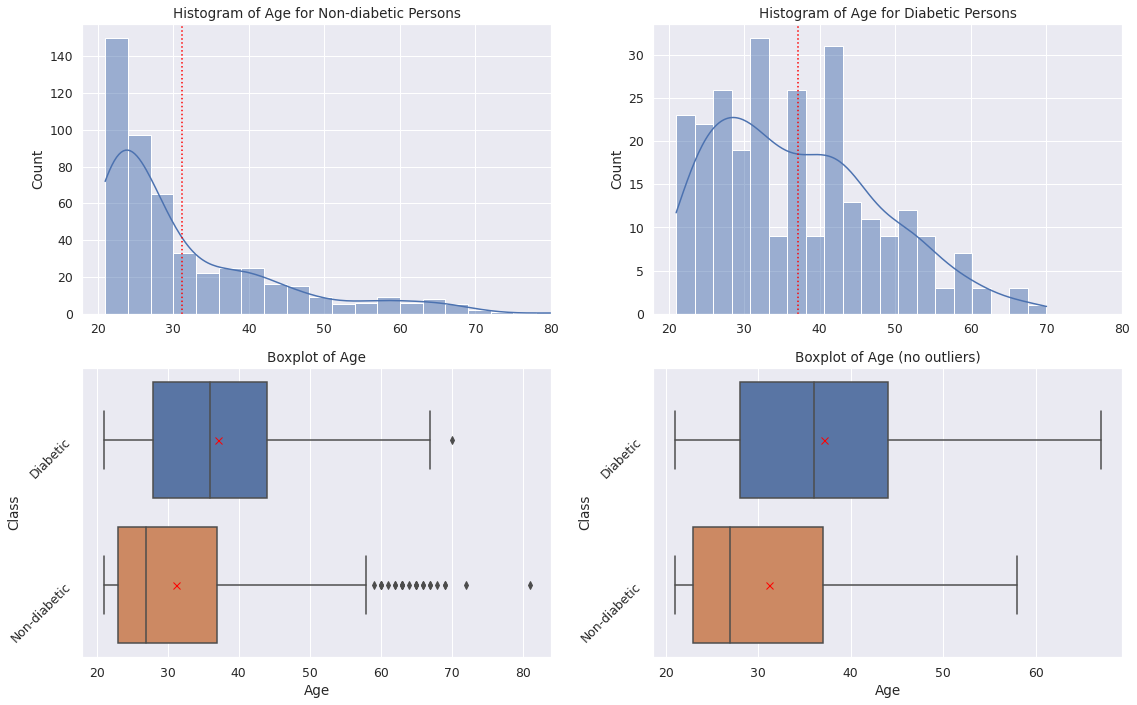

In [32]:
# Plotting the distribution of age wrt diabetes status 
plt.figure(figsize = (16, 10));
# Histograms
plt.subplot(221);
sns.histplot(data = df.loc[df.Class == 'Non-diabetic'], x = 'Age', kde = True, bins = 20);
plt.axvline(df.loc[df.Class == 'Non-diabetic'].Age.mean(), linestyle = ':', color = 'red');
plt.xlabel('');
plt.xlim(18, 80);
plt.title('Histogram of Age for Non-diabetic Persons');
plt.subplot(222);
sns.histplot(data = df.loc[df.Class == 'Diabetic'], x = 'Age', kde = True, bins = 20);
plt.axvline(df.loc[df.Class == 'Diabetic'].Age.mean(), linestyle = ':', color = 'red');
plt.xlabel('');
plt.xlim(18, 80);
plt.title('Histogram of Age for Diabetic Persons');
# Boxplots
plt.subplot(223);
bxplt = sns.boxplot(data = df, x = 'Age', y = 'Class', showmeans = True, 
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Age');
plt.yticks(rotation = 45);
plt.title('Boxplot of Age');
bxplt.yaxis.labelpad = -13
plt.subplot(224);
bxplt = sns.boxplot(data = df, x = 'Age', y = 'Class', showmeans = True, showfliers = False,
             meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Age');
plt.yticks(rotation = 45);
plt.title('Boxplot of Age (no outliers)');
bxplt.yaxis.labelpad = -13
plt.tight_layout(w_pad = 2);

## Data Preprocessing

### Missing value treatment

In [33]:
# Finding the percentage of zeros in each column
for col in zero_cols:
    num_nans = df[col].isnull().sum()
    print('{}% of entries in {} are missing.'.format(round(num_nans/df.shape[0]*100, 2), col)) 

0.65% of entries in Glucose are missing.
4.56% of entries in BloodPressure are missing.
29.56% of entries in SkinThickness are missing.
48.7% of entries in Insulin are missing.
1.43% of entries in BMI are missing.


In [34]:
# Dropping columns with too many missing values
df_imputed = df.drop(columns = 'Insulin', axis = 1)
zero_cols.remove('Insulin')

df_imputed.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,Pedigree,Age,Class,Class_num,Pregnancy_range
0,6,148.000,72.000,35.000,33.600,0.627,50,Diabetic,1,6-10
1,1,85.000,66.000,29.000,26.600,0.351,31,Non-diabetic,0,1-2
2,8,183.000,64.000,NaN,23.300,0.672,32,Diabetic,1,6-10
3,1,89.000,66.000,23.000,28.100,0.167,21,Non-diabetic,0,1-2
4,0,137.000,40.000,35.000,43.100,2.288,33,Diabetic,1,0


#### Notes:
Since close to 50% of entries for insulin are zero (missing), we chose to drop this variable.

In [35]:
# Difference between mean and median for cols with missing values (grouped by pregnancy and diabetes status)
print('Percentage of absolute difference between median and mean:', end = '\n'*2)
for col in zero_cols:
    print(np.abs(df_imputed.groupby(['Class', 'Pregnancy_range'])[col].median() - 
           df_imputed.groupby(['Class', 'Pregnancy_range'])[col].mean())/
           df_imputed.groupby(['Class', 'Pregnancy_range'])[col].median()*100, end = '\n'*2)

Percentage of absolute difference between median and mean:

Class         Pregnancy_range
Diabetic      0                 4.519
              1-2               5.243
              3-5               0.767
              6-10              1.043
              > 10              2.647
Non-diabetic  0                 5.609
              1-2               1.294
              3-5               1.760
              6-10              2.700
              > 10              7.412
Name: Glucose, dtype: float64

Class         Pregnancy_range
Diabetic      0                 1.436
              1-2               0.705
              3-5               0.099
              6-10              0.718
              > 10              2.886
Non-diabetic  0                 1.058
              1-2               1.178
              3-5               0.099
              6-10              1.244
              > 10              1.763
Name: BloodPressure, dtype: float64

Class         Pregnancy_range
Diabetic      0       

#### Notes: 
Due to the generally skewed nature of distributions, we will pick the median of variables with missing values to impute the entries that haven't been provided, while they are grouped by pregnancy and diabetes status. Regardless, there is not much difference between medians and means of different groups. 

In [36]:
# Imputing the columns with missing values using median
for col in zero_cols:
    df_imputed[col] = df_imputed[col].fillna(value = 
                                             df_imputed.groupby(['Class', 'Pregnancy_range'])[col].transform('median')) 
    
df_imputed.head()      

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,Pedigree,Age,Class,Class_num,Pregnancy_range
0,6,148.000,72.000,35.000,33.600,0.627,50,Diabetic,1,6-10
1,1,85.000,66.000,29.000,26.600,0.351,31,Non-diabetic,0,1-2
2,8,183.000,64.000,32.000,23.300,0.672,32,Diabetic,1,6-10
3,1,89.000,66.000,23.000,28.100,0.167,21,Non-diabetic,0,1-2
4,0,137.000,40.000,35.000,43.100,2.288,33,Diabetic,1,0


### Outlier Detection

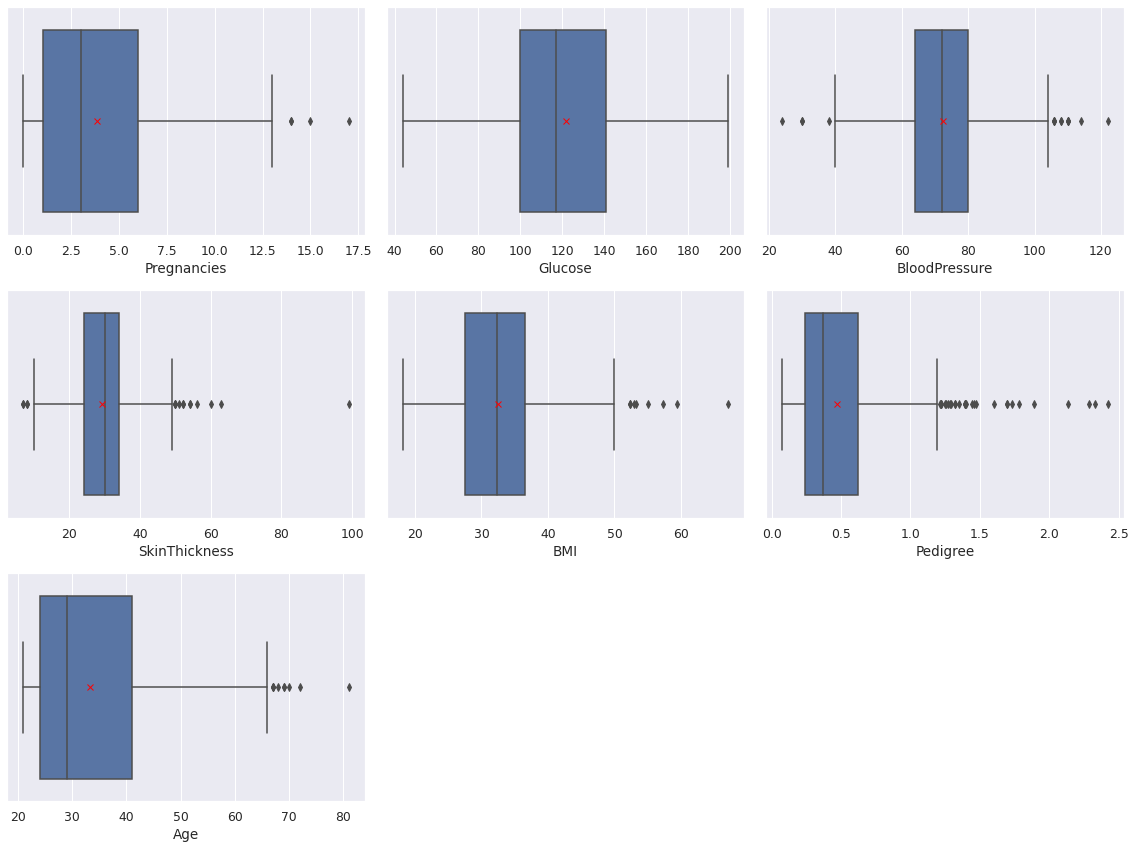

In [37]:
# Listing all numerical vars of df_imputed except diabetes status
num_vars = df_imputed.select_dtypes(include = np.number).columns.tolist()
num_vars.remove('Class_num')

# Plotting the boxplot of listed numerical vars
plt.figure(figsize = (16, 12));
for i, var in enumerate(num_vars):
    plt.subplot(3, 3, i+1);
    sns.boxplot(data = df_imputed, x = var, showmeans = True,
                meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '6'});
plt.tight_layout(); 

#### Observations:

For most numerical variables, there aren't too many outliers, and even those seem fairly continuous, natural and actually part of the dataset. Therefore, we choose not to treat the outliers. 

### Feature Engineering

Here, we'll drop the categorical diabetes status (class) and pregnancy range.

In [38]:
# Dropping the (duplicated) categorical columns
df_imputed.drop(columns = ['Class', 'Pregnancy_range'], axis = 1, inplace = True)
df_imputed.rename(columns = {'Class_num': 'Class'}, inplace = True)
df_imputed.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,Pedigree,Age,Class
0,6,148.000,72.000,35.000,33.600,0.627,50,1
1,1,85.000,66.000,29.000,26.600,0.351,31,0
2,8,183.000,64.000,32.000,23.300,0.672,32,1
3,1,89.000,66.000,23.000,28.100,0.167,21,0
4,0,137.000,40.000,35.000,43.100,2.288,33,1


### Post-Imputation EDA (brief)

In [39]:
# Building a dataframe containing the change in statistical properties before and after imputation
imput_effect = pd.DataFrame(index = zero_cols, columns = ['Median Change (%)', 'Mean Change (%)'])

for i, col in enumerate(zero_cols):
    imput_effect.iloc[i, 0] = (df_imputed[col].median() - df[col].median())/df[col].median()*100
    imput_effect.iloc[i, 1] = (df_imputed[col].mean() - df[col].mean())/df[col].mean()*100

imput_effect

,Median Change (%),Mean Change (%)
Glucose,0.000,-0.006
BloodPressure,0.000,0.025
SkinThickness,3.448,0.588
BMI,0.000,-0.053


**`Glucose Level`**

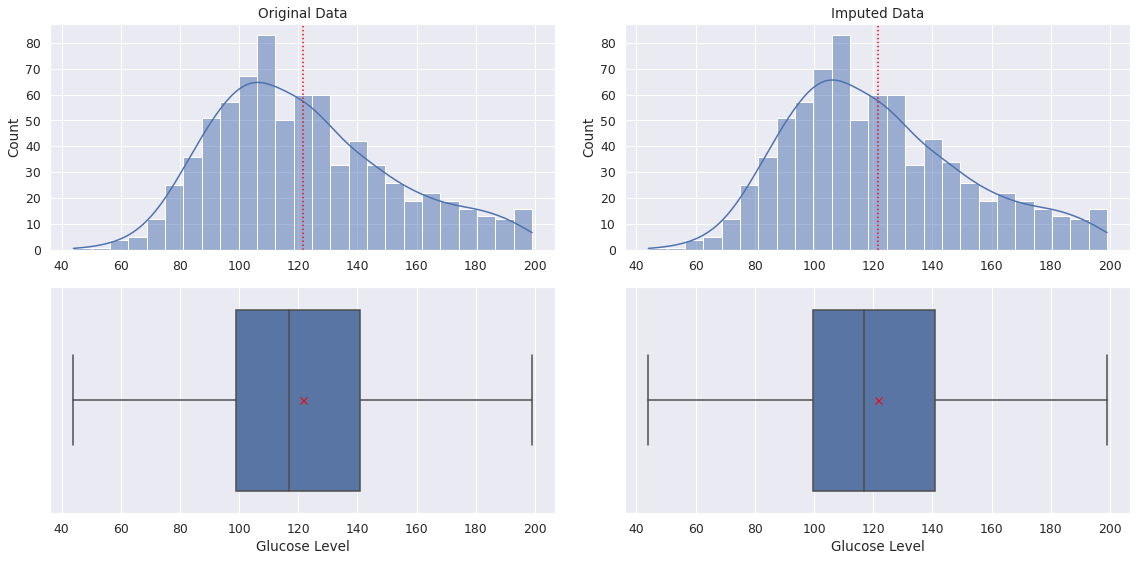

In [40]:
# Plotting the distribution of glucose level before and after imputation
plt.figure(figsize = (16, 8));
# Histograms
plt.subplot(221);
sns.histplot(data = df, x = 'Glucose', kde = True, bins = 25);
plt.axvline(df.Glucose.mean(), linestyle = ':', color = 'red');
plt.xlabel('');
plt.title('Original Data');
plt.subplot(222);
sns.histplot(data = df_imputed, x = 'Glucose', kde = True, bins = 25);
plt.axvline(df_imputed.Glucose.mean(), linestyle = ':', color = 'red');
plt.xlabel('');
plt.title('Imputed Data');
# Boxplots
plt.subplot(223);
bxplt = sns.boxplot(data = df, x = 'Glucose', showmeans = True, 
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Glucose Level');
plt.subplot(224);
bxplt = sns.boxplot(data = df_imputed, x = 'Glucose', showmeans = True,
             meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Glucose Level');
plt.tight_layout(w_pad = 2);

**`Blood Pressure Level`**

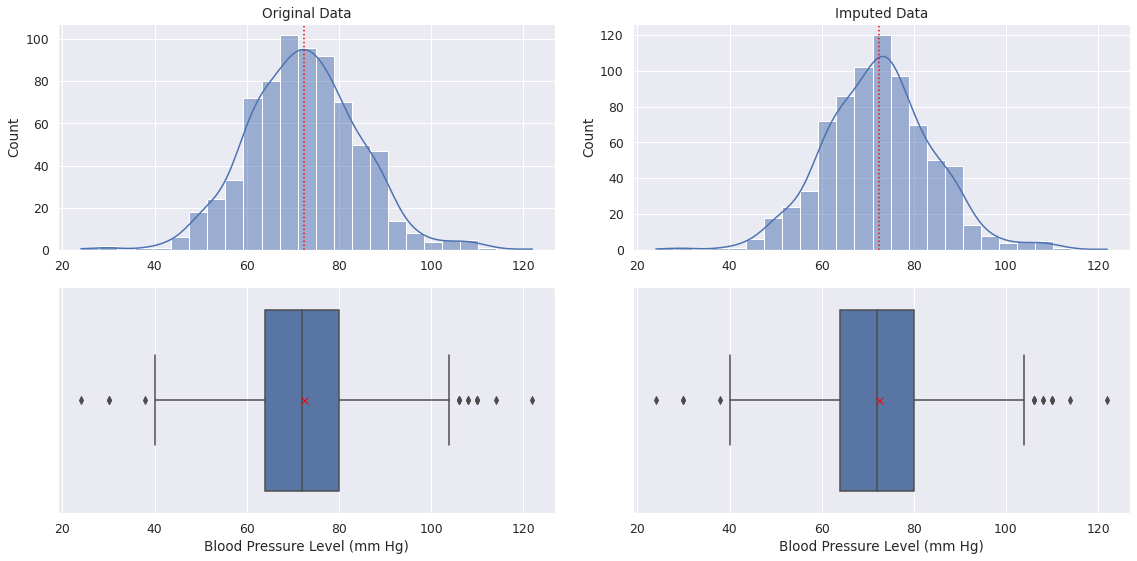

In [41]:
# Plotting the distribution of blood pressure level before and after imputation
plt.figure(figsize = (16, 8));
# Histograms
plt.subplot(221);
sns.histplot(data = df, x = 'BloodPressure', kde = True, bins = 25);
plt.axvline(df.BloodPressure.mean(), linestyle = ':', color = 'red');
plt.xlabel('');
plt.title('Original Data');
plt.subplot(222);
sns.histplot(data = df_imputed, x = 'BloodPressure', kde = True, bins = 25);
plt.axvline(df_imputed.BloodPressure.mean(), linestyle = ':', color = 'red');
plt.xlabel('');
plt.title('Imputed Data');
# Boxplots
plt.subplot(223);
bxplt = sns.boxplot(data = df, x = 'BloodPressure', showmeans = True, 
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Blood Pressure Level (mm Hg)');
plt.subplot(224);
bxplt = sns.boxplot(data = df_imputed, x = 'BloodPressure', showmeans = True,
             meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Blood Pressure Level (mm Hg)');
plt.tight_layout(w_pad = 2);

**`Skin Thickness`**

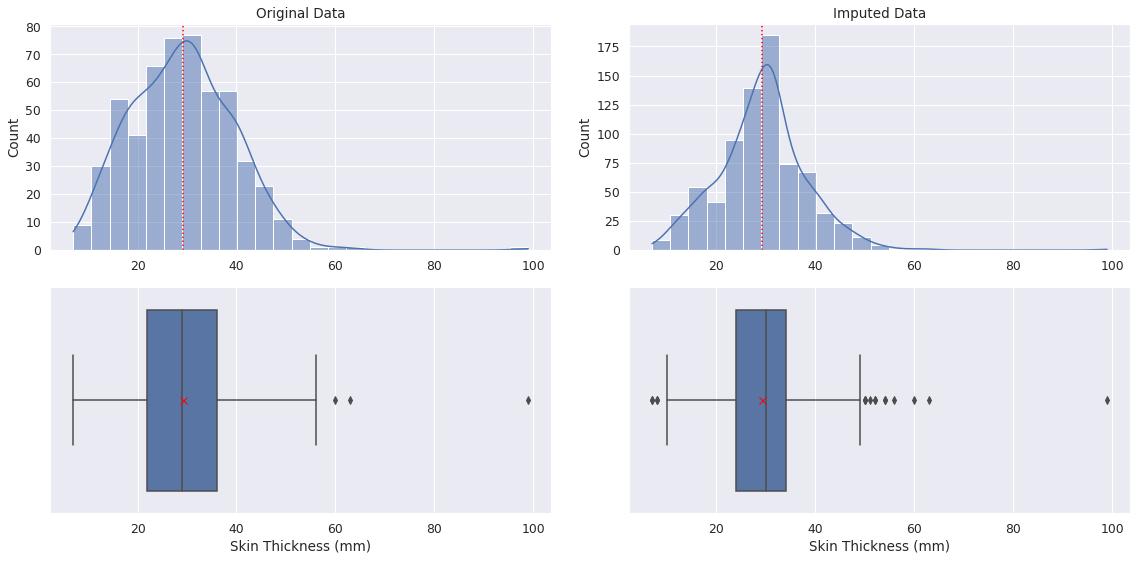

In [42]:
# Plotting the distribution of skin thickness before and after imputation
plt.figure(figsize = (16, 8));
# Histograms
plt.subplot(221);
sns.histplot(data = df, x = 'SkinThickness', kde = True, bins = 25);
plt.axvline(df.SkinThickness.mean(), linestyle = ':', color = 'red');
plt.xlabel('');
plt.title('Original Data');
plt.subplot(222);
sns.histplot(data = df_imputed, x = 'SkinThickness', kde = True, bins = 25);
plt.axvline(df_imputed.SkinThickness.mean(), linestyle = ':', color = 'red');
plt.xlabel('');
plt.title('Imputed Data');
# Boxplots
plt.subplot(223);
bxplt = sns.boxplot(data = df, x = 'SkinThickness', showmeans = True, 
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Skin Thickness (mm)');
plt.subplot(224);
bxplt = sns.boxplot(data = df_imputed, x = 'SkinThickness', showmeans = True,
             meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Skin Thickness (mm)');
plt.tight_layout(w_pad = 2);

**`BMI`**

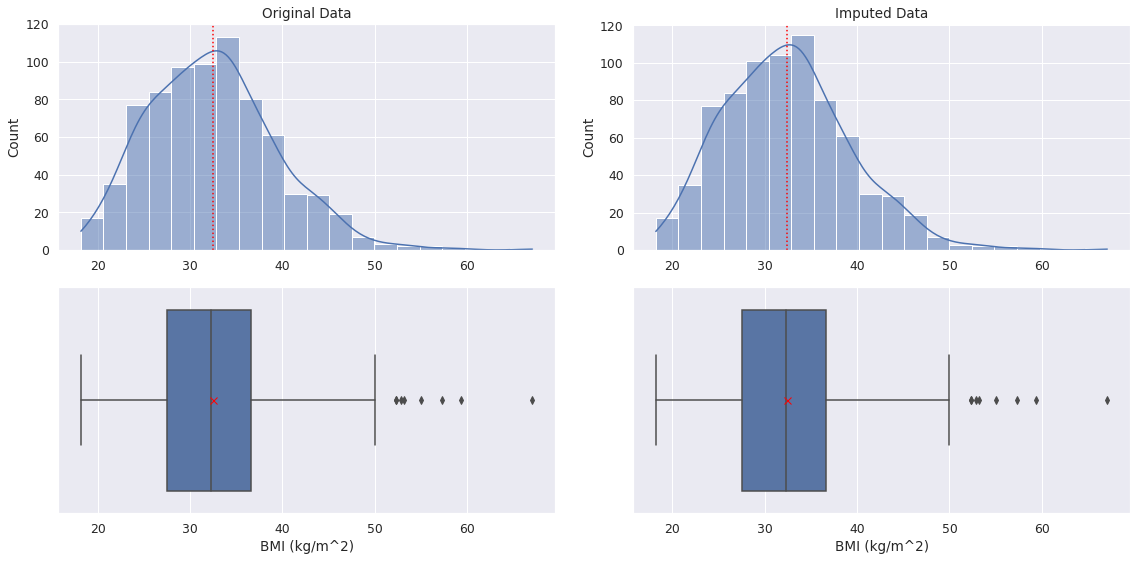

In [43]:
# Plotting the distribution of BMI before and after imputation
plt.figure(figsize = (16, 8));
# Histograms
plt.subplot(221);
sns.histplot(data = df, x = 'BMI', kde = True, bins = 20);
plt.axvline(df.BMI.mean(), linestyle = ':', color = 'red');
plt.xlabel('');
plt.title('Original Data');
plt.ylim(0, 120);
plt.subplot(222);
sns.histplot(data = df_imputed, x = 'BMI', kde = True, bins = 20);
plt.axvline(df_imputed.BMI.mean(), linestyle = ':', color = 'red');
plt.xlabel('');
plt.title('Imputed Data');
# Boxplots
plt.subplot(223);
bxplt = sns.boxplot(data = df, x = 'BMI', showmeans = True, 
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('BMI (kg/m^2)');
plt.subplot(224);
bxplt = sns.boxplot(data = df_imputed, x = 'BMI', showmeans = True,
             meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('BMI (kg/m^2)');
plt.tight_layout(w_pad = 2);

#### Observations:

Except for the 'SkinThickness' column that had ~ 30% of its entries missing, the distribution of the imputed variables have barely changed. 

## Model Building

In [44]:
# Auxiliray function for plotting confusion matrix in the form of a heatmap

def plot_confusion_matrix(y_truth, y_pred):
  
  # Calculating the confusion matrix
  cm = confusion_matrix(y_truth, y_pred)
  # Converting the confusion matrix into a dataframe
  cm_df = pd.DataFrame(cm, index = ['Truth - No', 'Truth - Yes'], 
                       columns = ['Prediction - No', 'Prediction - Yes']) 
  
  labels = []
  # Generating the labels of the confusion matrix heatmap
  for i in range(len(cm.flatten())):
    labels.append(str(cm.flatten()[i]) + '\n (' + str(round(cm.flatten()[i]/cm.flatten().sum()*100, 2)) + '%)')
  labels = np.asarray(labels).reshape(2, 2)

  # Plotting the confusion matrix as a heatmap
  sns.heatmap(cm_df, annot = labels, fmt = '', cmap = 'seismic', cbar = False, 
              vmin = -len(y_truth), vmax = len(y_truth));
  plt.xlabel('Prediction'); 
  plt.ylabel('Truth'); 

In [45]:
# Auxiliary function for demonstrating the evaluation materics in the form of a dataframe

def model_eval(model, x_train, y_train, x_test, y_test):

  # Reconstructing the training set using the model
  y_recon = model.predict(x_train)
  # Making prediction for the testing set using the model
  y_pred = model.predict(x_test)

  # Performance dataframe
  perform_df = pd.DataFrame(index = ['Train', 'Test'], columns = ['Accuracy', 'Recall',
                                                                  'Precision', 'F1', 'Specificity'])
  # Displaying the performance measures for training set
  perform_df.iloc[0, :] = [accuracy_score(y_train, y_recon), recall_score(y_train, y_recon),
                           precision_score(y_train, y_recon), f1_score(y_train, y_recon), 
                           recall_score(y_train, y_recon, pos_label = 0)] 
  # Displaying the performance measures for testing set
  perform_df.iloc[1, :] = [accuracy_score(y_test, y_pred), recall_score(y_test, y_pred),
                           precision_score(y_test, y_pred), f1_score(y_test, y_pred), 
                           recall_score(y_test, y_pred, pos_label = 0)] 
  return perform_df

### Building Training and Testing Sets

In [46]:
# Separating predictors from target
df_model = df_imputed.copy() 
y = df_model['Class']
X = df_model.drop(columns = 'Class', axis = 1)
X.rename(columns = {'BloodPressure': 'Blood Pressure', 'SkinThickness': 'Skin Thickness'}, inplace = True)

# Dividing the dataset into training and testing sets with an 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

In [47]:
# Ensuring that classes have been divided with the same proportion between train and test sets
print('Split of classes in training set:\n', y_train.value_counts(1), sep = '')
print('\nSplit of classes in testing set:\n', y_test.value_counts(1), sep = '')

Split of classes in training set:
0   0.651
1   0.349
Name: Class, dtype: float64

Split of classes in testing set:
0   0.649
1   0.351
Name: Class, dtype: float64


### Decision Tree Model

In [48]:
# Building the full tree
dtr0 = DecisionTreeClassifier(random_state = 1)
dtr0 = dtr0.fit(X_train, y_train)

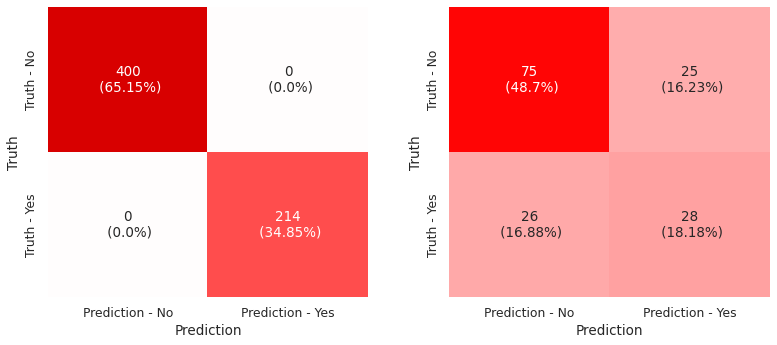

In [49]:
# Demonstrating confusion matrices of full tree on training and testing sets
y_recon = dtr0.predict(X_train)  # reconstructing the train set 
y_pred  = dtr0.predict(X_test)   # forecasting the test set

plt.figure(figsize = (11, 5));
plt.subplot(121);
plot_confusion_matrix(y_train, y_recon)
plt.subplot(122);
plot_confusion_matrix(y_test, y_pred)
plt.tight_layout(w_pad = 3);

In [50]:
# Evaluating the model performance on training and testing sets
dtr0_performance = model_eval(dtr0, X_train, y_train, X_test, y_test) 
dtr0_performance

,Accuracy,Recall,Precision,F1,Specificity
Train,1.000,1.000,1.000,1.000,1.000
Test,0.669,0.519,0.528,0.523,0.750


### Random Forest Model

In [51]:
# Building the initial random forest model (no tuning)
rf0 = RandomForestClassifier(random_state = 1)
rf0 = rf0.fit(X_train, y_train)

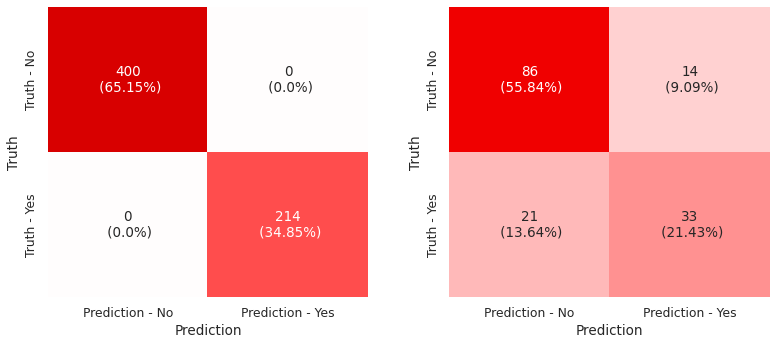

In [52]:
# Demonstrating confusion matrices of random forest on training and testing sets
y_recon = rf0.predict(X_train)  # reconstructing the train set 
y_pred  = rf0.predict(X_test)   # forecasting the test set

plt.figure(figsize = (11, 5));
plt.subplot(121);
plot_confusion_matrix(y_train, y_recon)
plt.subplot(122);
plot_confusion_matrix(y_test, y_pred)
plt.tight_layout(w_pad = 3);

In [53]:
# Evaluating the model performance on training and testing sets
rf0_performance = model_eval(rf0, X_train, y_train, X_test, y_test) 
rf0_performance

,Accuracy,Recall,Precision,F1,Specificity
Train,1.000,1.000,1.000,1.000,1.000
Test,0.773,0.611,0.702,0.653,0.860


### Bagging Classifier Model

In [54]:
# Building the initial bagging model (no tuning)
bg0 = BaggingClassifier(random_state = 1)
bg0 = bg0.fit(X_train, y_train)

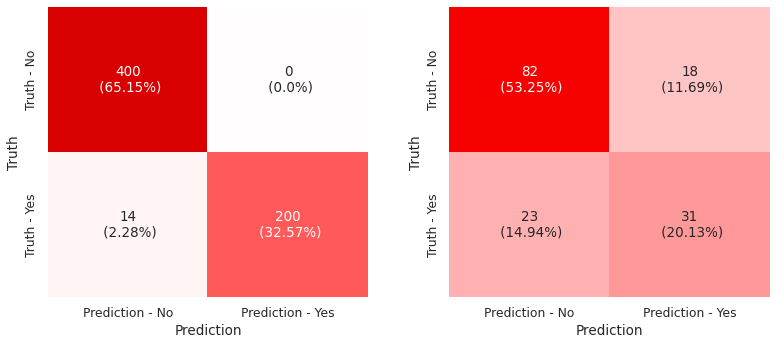

In [55]:
# Demonstrating confusion matrices of bagging model on training and testing sets
y_recon = bg0.predict(X_train)  # reconstructing the train set 
y_pred  = bg0.predict(X_test)   # forecasting the test set

plt.figure(figsize = (11, 5));
plt.subplot(121);
plot_confusion_matrix(y_train, y_recon)
plt.subplot(122);
plot_confusion_matrix(y_test, y_pred)
plt.tight_layout(w_pad = 3);

In [56]:
# Evaluating the model performance on training and testing sets
bg0_performance = model_eval(bg0, X_train, y_train, X_test, y_test) 
bg0_performance

,Accuracy,Recall,Precision,F1,Specificity
Train,0.977,0.935,1.000,0.966,1.000
Test,0.734,0.574,0.633,0.602,0.820


### Hyperparameter Tuning of Decision Tree

In [57]:
# Hyperparameter tuning (pre-pruning) of the full tree

# Defining the base model
base_tree = DecisionTreeClassifier(random_state = 1)

# Setting the range of hyperparameters
hyperparams = {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'class_weight': ['balanced', None], 
               'max_depth': np.arange(2, 8), 'min_samples_split': [5, 10, 15, 20, 30], 
               'max_leaf_nodes': [2, 4, 6, 10, 15, 20], 'min_impurity_decrease': [1e-4, 1e-3, 0.01, 0.05]}

# Setting the accuracy criterion
acc_criterion = make_scorer(recall_score)

# Conducting a grid search over the entire range of hyperparameters
all_trees = GridSearchCV(base_tree, param_grid = hyperparams, scoring = acc_criterion, cv = 5)
all_trees = all_trees.fit(X_train, y_train)

# Selecting the best-performing tree
dtr_tuned = all_trees.best_estimator_
dtr_tuned = dtr_tuned.fit(X_train, y_train)

# Printing the properties of the tuned tree
print('Selected impurity criterion:', dtr_tuned.criterion)
dtr_tuned

Selected impurity criterion: entropy


DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, max_leaf_nodes=10,
                       min_impurity_decrease=0.0001, min_samples_split=30,
                       random_state=1, splitter='random')

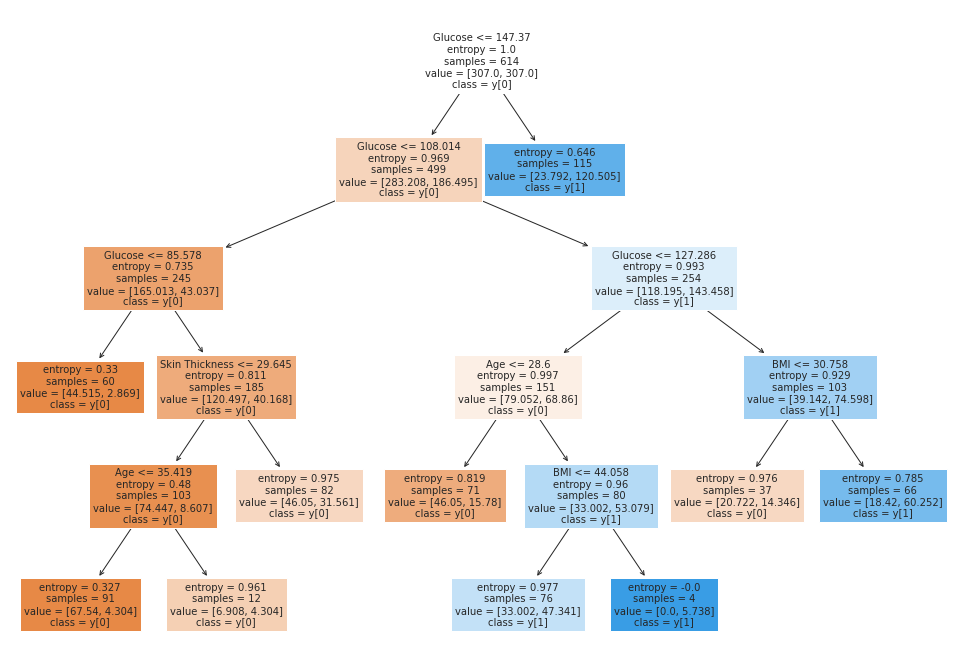

In [58]:
# Plotting the pruned tree
plt.figure(figsize = (17, 12));
tree.plot_tree(dtr_tuned, feature_names = X_train.columns.tolist(), 
               filled = True, fontsize = 10, node_ids = False, class_names = True)
plt.show()

In [59]:
# Displaying the equations of the pruned tree
print(tree.export_text(dtr_tuned, feature_names = X_train.columns.tolist(), show_weights = True))

|--- Glucose <= 147.37
|   |--- Glucose <= 108.01
|   |   |--- Glucose <= 85.58
|   |   |   |--- weights: [44.51, 2.87] class: 0
|   |   |--- Glucose >  85.58
|   |   |   |--- Skin Thickness <= 29.65
|   |   |   |   |--- Age <= 35.42
|   |   |   |   |   |--- weights: [67.54, 4.30] class: 0
|   |   |   |   |--- Age >  35.42
|   |   |   |   |   |--- weights: [6.91, 4.30] class: 0
|   |   |   |--- Skin Thickness >  29.65
|   |   |   |   |--- weights: [46.05, 31.56] class: 0
|   |--- Glucose >  108.01
|   |   |--- Glucose <= 127.29
|   |   |   |--- Age <= 28.60
|   |   |   |   |--- weights: [46.05, 15.78] class: 0
|   |   |   |--- Age >  28.60
|   |   |   |   |--- BMI <= 44.06
|   |   |   |   |   |--- weights: [33.00, 47.34] class: 1
|   |   |   |   |--- BMI >  44.06
|   |   |   |   |   |--- weights: [0.00, 5.74] class: 1
|   |   |--- Glucose >  127.29
|   |   |   |--- BMI <= 30.76
|   |   |   |   |--- weights: [20.72, 14.35] class: 0
|   |   |   |--- BMI >  30.76
|   |   |   |   |--- weig

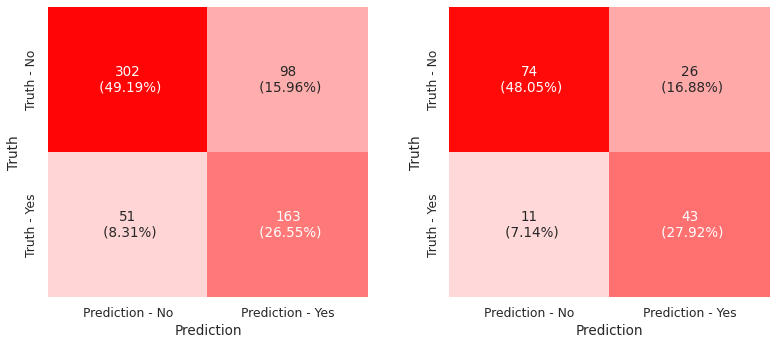

In [60]:
# Demonstrating confusion matrices of full tree on training and testing sets
y_recon = dtr_tuned.predict(X_train)  # reconstructing the train set 
y_pred  = dtr_tuned.predict(X_test)   # forecasting the test set

plt.figure(figsize = (11, 5));
plt.subplot(121);
plot_confusion_matrix(y_train, y_recon)
plt.subplot(122);
plot_confusion_matrix(y_test, y_pred)
plt.tight_layout(w_pad = 3);

In [61]:
# Evaluating the model performance on training and testing sets
dtr_tuned_performance = model_eval(dtr_tuned, X_train, y_train, X_test, y_test) 
dtr_tuned_performance

,Accuracy,Recall,Precision,F1,Specificity
Train,0.757,0.762,0.625,0.686,0.755
Test,0.760,0.796,0.623,0.699,0.740


### Hyperparameter Tuning of Random Forest

In [62]:
# Hyperparameter tuning of the random forest

# Defining the base model
base_forest = RandomForestClassifier(class_weight = 'balanced', random_state = 1)

# Setting the range of hyperparameters
hyperparams = {'n_estimators': [30, 50, 75, 100, 150, 200], 
               'max_samples': np.arange(0.6, 1.1, 0.1), 
               'max_features': np.arange(0.6, 1.1, 0.1),
               'max_depth': np.arange(2, 8), 
               'min_samples_split': [5, 10, 15, 20], 
               'min_impurity_decrease': [1e-4, 1e-3, 0.01, 0.05]}

# Setting the accuracy criterion
acc_criterion = make_scorer(recall_score)

# Conducting a grid search over the entire range of hyperparameters
all_forests = GridSearchCV(base_forest, param_grid = hyperparams, scoring = acc_criterion, cv = 5, n_jobs = -1)
all_forests = all_forests.fit(X_train, y_train)

# Selecting the best-performing tree
rf_tuned = all_forests.best_estimator_
rf_tuned = rf_tuned.fit(X_train, y_train)

# Printing the properties of the tuned tree
rf_tuned

RandomForestClassifier(class_weight='balanced', max_depth=2,
                       max_features=0.8999999999999999, max_samples=0.7,
                       min_impurity_decrease=0.0001, min_samples_split=5,
                       n_estimators=50, random_state=1)

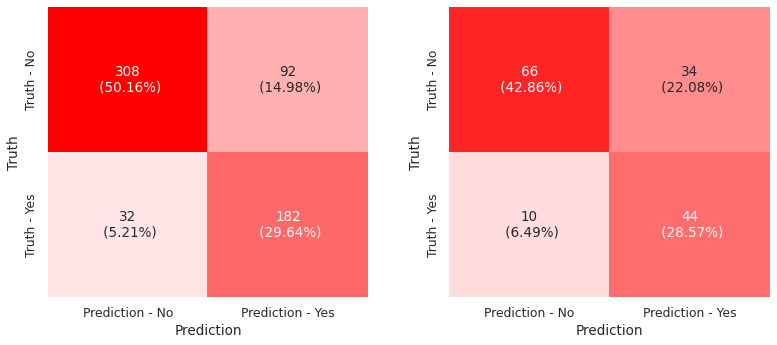

In [63]:
# Demonstrating confusion matrices of the random forest on training and testing sets
y_recon = rf_tuned.predict(X_train)  # reconstructing the train set 
y_pred  = rf_tuned.predict(X_test)   # forecasting the test set

plt.figure(figsize = (11, 5));
plt.subplot(121);
plot_confusion_matrix(y_train, y_recon)
plt.subplot(122);
plot_confusion_matrix(y_test, y_pred)
plt.tight_layout(w_pad = 3);

In [64]:
# Evaluating the model performance on training and testing sets
rf_tuned_performance = model_eval(rf_tuned, X_train, y_train, X_test, y_test) 
rf_tuned_performance

,Accuracy,Recall,Precision,F1,Specificity
Train,0.798,0.850,0.664,0.746,0.770
Test,0.714,0.815,0.564,0.667,0.660


### Hyperparameter Tuning of Bagging Classifier Model

In [65]:
# Hyperparameter tuning of the bagging classifier

# Defining the base model
base_bag = BaggingClassifier(random_state = 1)

# Setting the range of hyperparameters
hyperparams = {'n_estimators': [20, 35, 50, 70, 100, 150], 'max_samples': np.arange(0.6, 1.1, 0.1), 
               'max_features': np.arange(0.6, 1.1, 0.1),}

# Setting the accuracy criterion
acc_criterion = make_scorer(recall_score)

# Conducting a grid search over the entire range of hyperparameters
all_bags = GridSearchCV(base_bag, param_grid = hyperparams, scoring = acc_criterion, cv = 5, n_jobs = -1)
all_bags = all_bags.fit(X_train, y_train)

# Selecting the best-performing tree
bg_tuned = all_bags.best_estimator_
bg_tuned = bg_tuned.fit(X_train, y_train)

# Printing the properties of the tuned tree
bg_tuned

BaggingClassifier(max_features=0.8999999999999999,
                  max_samples=0.9999999999999999, n_estimators=100,
                  random_state=1)

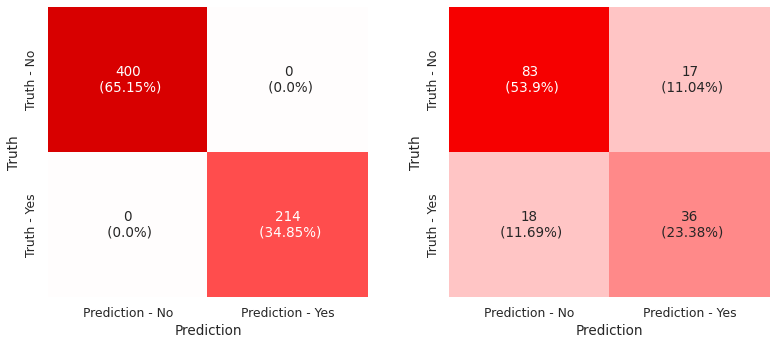

In [66]:
# Demonstrating confusion matrices of the bagging classifier on training and testing sets
y_recon = bg_tuned.predict(X_train)  # reconstructing the train set 
y_pred  = bg_tuned.predict(X_test)   # forecasting the test set

plt.figure(figsize = (11, 5));
plt.subplot(121);
plot_confusion_matrix(y_train, y_recon)
plt.subplot(122);
plot_confusion_matrix(y_test, y_pred)
plt.tight_layout(w_pad = 3);

In [67]:
# Evaluating the model performance on training and testing sets
bg_tuned_performance = model_eval(bg_tuned, X_train, y_train, X_test, y_test) 
bg_tuned_performance

,Accuracy,Recall,Precision,F1,Specificity
Train,1.000,1.000,1.000,1.000,1.000
Test,0.773,0.667,0.679,0.673,0.830


## Comparing the Performance of All Models


In [68]:
# Combining the evaluation metrics of all models
compare_df = pd.concat([dtr0_performance, rf0_performance, bg0_performance, 
                        dtr_tuned_performance, rf_tuned_performance, bg_tuned_performance])

# Separating the performance metrics of training and testing sets
compare_train = compare_df.iloc[0::2, :]
compare_test = compare_df.iloc[1::2, :]

# Labeling the models
compare_train.index = ['Full Tree', 'Random Forest', 'Bagging Classifier',
                       'Pruned Tree', 'Tuned Random Forest', 'Tuned Bagging Classifier']
compare_test.index = ['Full Tree', 'Random Forest', 'Bagging Classifier',
                       'Pruned Tree', 'Tuned Random Forest', 'Tuned Bagging Classifier']

In [69]:
# Displaying the performance of all models on training set
compare_train

,Accuracy,Recall,Precision,F1,Specificity
Full Tree,1.000,1.000,1.000,1.000,1.000
Random Forest,1.000,1.000,1.000,1.000,1.000
Bagging Classifier,0.977,0.935,1.000,0.966,1.000
Pruned Tree,0.757,0.762,0.625,0.686,0.755
Tuned Random Forest,0.798,0.850,0.664,0.746,0.770
Tuned Bagging Classifier,1.000,1.000,1.000,1.000,1.000


In [70]:
# Displaying the performance of all models on testing set
compare_test

,Accuracy,Recall,Precision,F1,Specificity
Full Tree,0.669,0.519,0.528,0.523,0.750
Random Forest,0.773,0.611,0.702,0.653,0.860
Bagging Classifier,0.734,0.574,0.633,0.602,0.820
Pruned Tree,0.760,0.796,0.623,0.699,0.740
Tuned Random Forest,0.714,0.815,0.564,0.667,0.660
Tuned Bagging Classifier,0.773,0.667,0.679,0.673,0.830


## Feature Importance of Tuned Models

Note that ***bagging classifier*** doesn't have any method to compute the importance of features.

### Tuned Tree

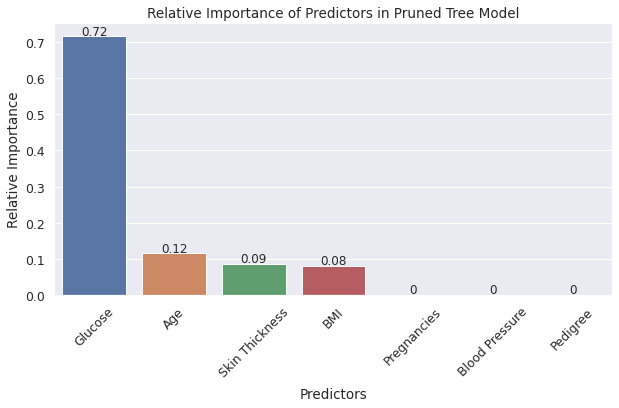

In [71]:
# Making a dataframe of features and their relative importance
imp_df = pd.DataFrame({'Predictors': X_train.columns.tolist(), 'Relative Importance': dtr_tuned.feature_importances_})
imp_df = imp_df.sort_values(by = 'Relative Importance', ascending = False)

# Plotting the relative importance of predictors 
plt.figure(figsize = (10, 5));
barplt = sns.barplot(data = imp_df, x = 'Predictors', y = 'Relative Importance');
countplot_labeling(barplt, imp_df, perc = False, decimal = 2)
plt.xticks(rotation = 45);
plt.title('Relative Importance of Predictors in Pruned Tree Model')
barplt.xaxis.labelpad = 8

### Tuned Random Forest

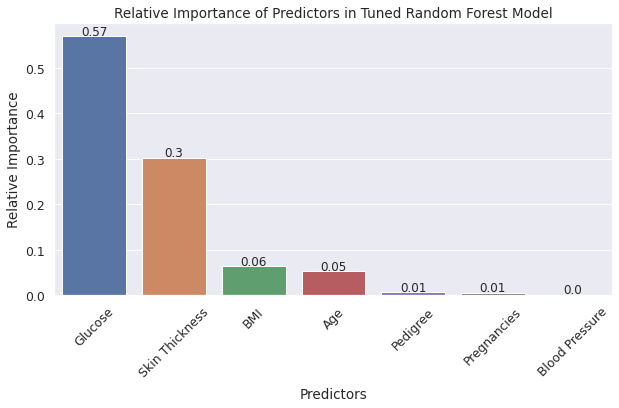

In [72]:
# Making a dataframe of features and their relative importance
imp_df = pd.DataFrame({'Predictors': X_train.columns.tolist(), 'Relative Importance': rf_tuned.feature_importances_})
imp_df = imp_df.sort_values(by = 'Relative Importance', ascending = False)

# Plotting the relative importance of predictors 
plt.figure(figsize = (10, 5));
barplt = sns.barplot(data = imp_df, x = 'Predictors', y = 'Relative Importance');
countplot_labeling(barplt, imp_df, perc = False, decimal = 2)
plt.xticks(rotation = 45);
plt.title('Relative Importance of Predictors in Tuned Random Forest Model')
barplt.xaxis.labelpad = 8